In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
#Verificando duplicatas
df.duplicated().sum()

50

In [5]:
#Verificando se a nulos
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Como há poucos nulos e eles estão presentes em todas as colunas, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
# Eliminando os valoes duplicados 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.040123,6.675235,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [19]:
# Selecionando apenas as colunas textuais
numeric_columns = df.select_dtypes(include=['float']).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  324 non-null    int32 
 1   Gender               324 non-null    object
 2   Education Level      324 non-null    object
 3   Job Title            324 non-null    object
 4   Years of Experience  324 non-null    int32 
 5   Salary               324 non-null    int32 
dtypes: int32(3), object(3)
memory usage: 13.9+ KB


In [20]:
# Primeiro, o código está gerando estatísticas descritivas que resumem a tendência central,
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
# Isso fornece insights sobre a dispersão dos dados.
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
# Ou seja, é uma medida da dispersão em termos percentuais.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
# Um valor de assimetria positivo indica uma distribuição com cauda à direita ou positiva.
# Um valor de assimetria negativo indica uma distribuição com cauda à esquerda ou negativa.
df_describe.loc['skewness'] = df.skew()

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

,count,mean,std,min,25%,50%,75%,max,amp,cv,skewness
Age,324.0,37.38,7.19,23.0,31.0,36.5,44.0,53.0,30.0,19.22,0.20
Years of Experience,324.0,10.04,6.68,0.0,4.0,9.0,16.0,25.0,25.0,66.49,0.35
Salary,324.0,99985.65,48652.27,350.0,55000.0,95000.0,140000.0,250000.0,249650.0,48.66,0.44


In [21]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=['object']).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts())
    print('\n')

Coluna: Gender
Male      170
Female    154
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64


Coluna: Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job Title, Length: 174, dtype: int64




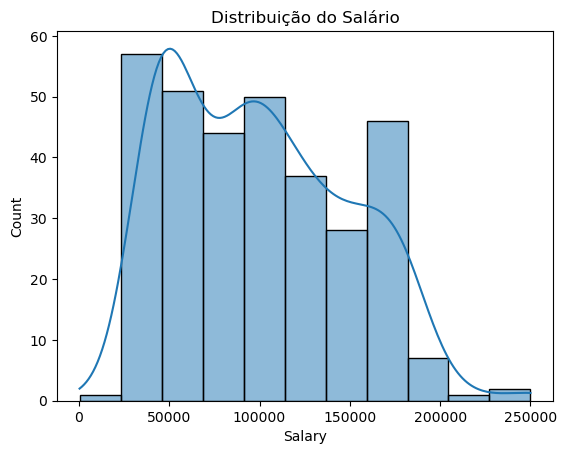

In [22]:
plt.title("Distribuição do Salário")
sns.histplot(data=df, x="Salary", kde=True);

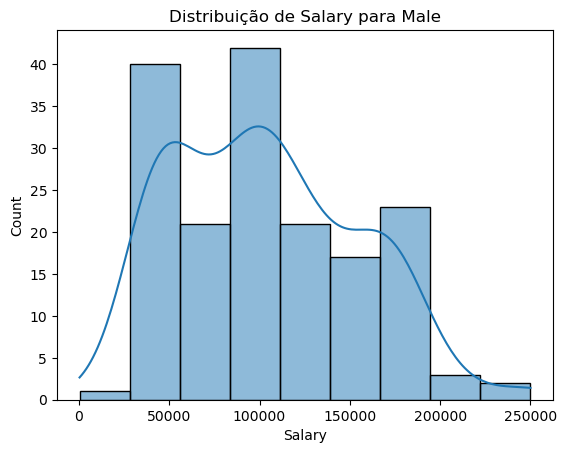

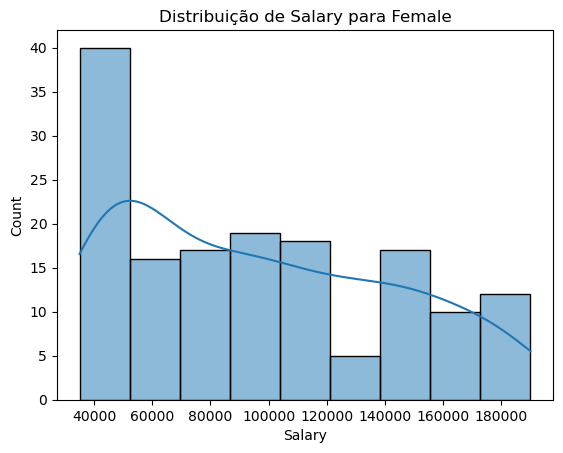

In [11]:
# Percorrendo cada categoria única na coluna 'Gender'
for genero in df["Gender"].unique():
    # Criando o título do gráfico
    plt.title(f"Distribuição de Salary para {genero}")
    # Criando o histograma
    sns.histplot(data=df[df["Gender"] == genero], x="Salary", kde=True)
    # Exibindo o gráfico
    plt.show()

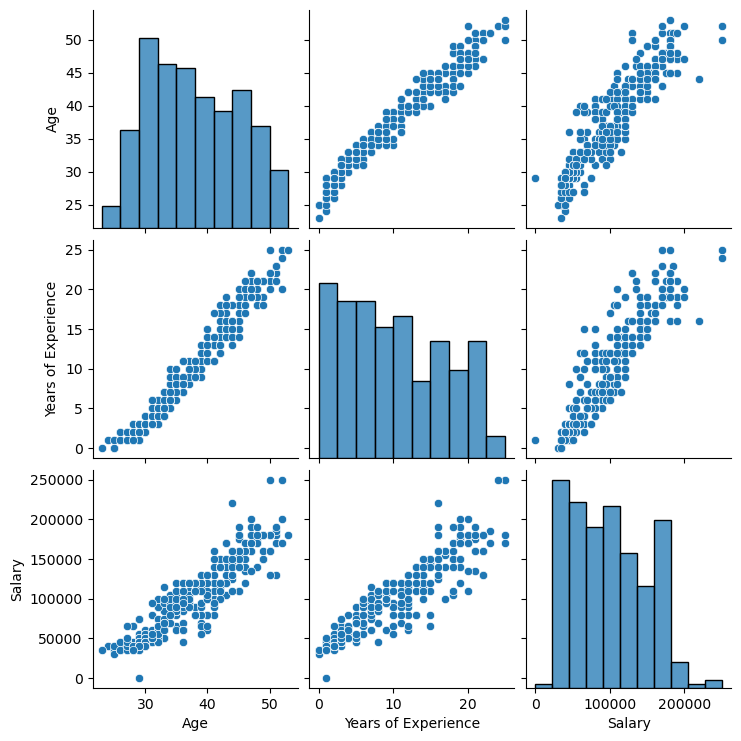

In [23]:
sns.pairplot(df);

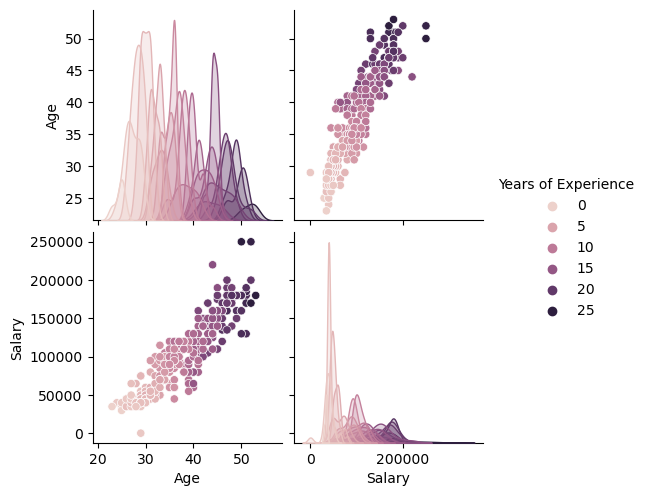

In [24]:
sns.pairplot(df, hue="Years of Experience")

<AxesSubplot:>

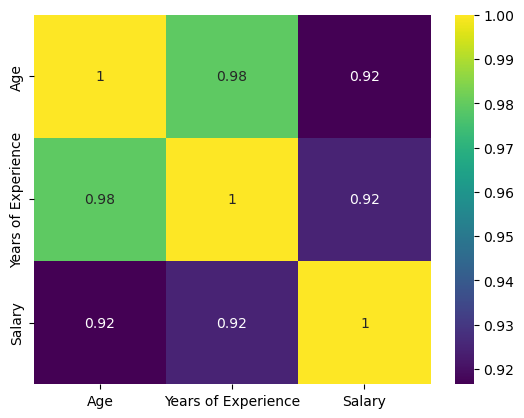

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')